# Network Flows

## Network
Network is a connected, directed graph where contains two elements, nodes and edges. Node is a point with assigned value of demend/supply and edge is a line to connect a pair of nodes. In mathematics, we use $G = (V,E)$ to represent a network where G is a connected, directed graph. $V$ is the set of nodes and $E$ is the set of edges (Flow network 2022). To visualize network and understand what is a connected, directed graph, we import networkx for plotting network graphs.



### Graph Visualization -- a connected, directed graph

#### Import required packages

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Generate Dataframe

In [2]:
network_graph = pd.DataFrame({'V':['1','1','1','2','3','4','2','2'], 
                              'E':['2','3','4','4','5','5','3','5']})

network_graph produces a dataframe which contains two arrays. $V$ is an array of nodes and $E$ is an array of edges. Notice that the first element in the array $V$ and $E$ is '1' and '2' respectively. This tells us, the demand/supply starts from node 1 and will be transfer to node 2. Thus we can set up and adjust different routes for $(V,E) pair in this dataframe. To make this happen, we use nx.DiGraph to build directions on the edges.

#### Create Directed Graph

In [3]:
dg = nx.DiGraph()
for i, elrow in network_graph.iterrows():
    dg.add_edge(elrow[0], elrow[1],)

We use DiGraph in networkx package for constructing a directed graph. Directed graphs have orientations on the edges and we create a for loop to make all edges have directions in the directed graph dg. If there is no direction for edges, then the graph is not directed and thus not a network.

#### Add Nodes

In [4]:
dg.add_node('1',position=(0.4,0.4))
dg.add_node('2',position=(0.8,0.8))
dg.add_node('3',position=(0.8,0.4))
dg.add_node('4',position=(0.8,0))
dg.add_node('5',position=(1.2,0.4))

We add nodes to the directed graph with 2-D coordinates. In this case, we have five nodes.

#### Plot the Graph

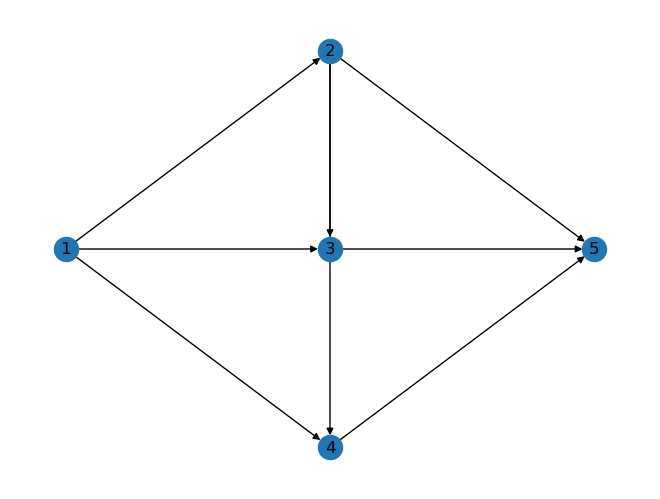

In [5]:
position = nx.get_node_attributes(dg,'position') 
nx.draw(dg,position,with_labels=True)
plt.show()

Then we plot the directed graph. As can be seen, the initial node is '1' and the destination is '5'. The others are intermediate nodes. All the nodes are connected by edges, and this is a connected, directed graph. If the graph is not connected, then some of the nodes will have no edges.

### Graph Visualization -- a disconnected, directed graph

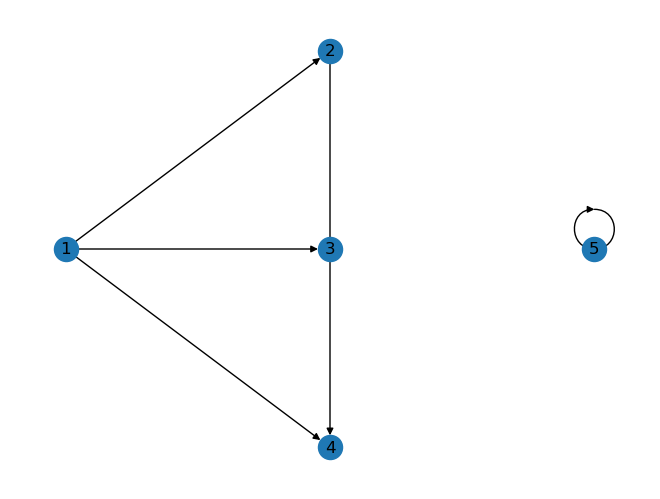

In [6]:
network_graph = pd.DataFrame({'V':['1','1','1','2','5'], 
                              'E':['2','3','4','4','5']})
dg = nx.DiGraph()
for i, elrow in network_graph.iterrows():
    dg.add_edge(elrow[0], elrow[1],)
nx.draw(dg,position,with_labels=True)
plt.show()

Here is a directed, but disconnected graph. Node 5 only connects to itself and not connected to other nodes. To check the connectivity, we have to ensure every pair of vertices in the graph is connected with at least a path between every pair of nodes.

## Network Flows
Network flow is based on network, and it is often connected with modeling traffics,transportation, routing problems. We build network flows in linear programming to track and evaluate transportation sources and costs of moving materials in various locations (Goldberg & Tarjan, 1989). Different from networks, each edge has a capacity and a flow for network flows. The constraints are the amount of flow on an edge should be less than the maximum capacity of the edge.

Network flow problems can be formluated by matrices included objective function, decision variables and constraints. However, the scale of network problems could be various with different number of constraints and decision variables. The intuition to build network flows helps people to distinguish the exact shifts of materials and how to maximize the output and minimize costs. In reality, the capacities of edges are not infinite, and sometimes very limited. To allocate the routing for each edge and make the most effieicnet route of transportation in a network flow, we can build a linear programming for maximizing the network flows with the help of a solver for calculating such problems.

## Case Study -- Maximize Network Flows
In order to maximize the output without exceeding capacity, we have to solve for the most efficient way to maximize the resources in different paths. Maximize network flows aim to find a feasible flow that can be sent from source to output without exceeding capacity of edge and maximize the flow rate (Goldberg & Tarjan, 1989). In this section, we are going to consider a pipe water flow problem.

### Two-Routes Pipe Case
#### Direct Calculation

In [7]:
network_graph = pd.DataFrame({'V':['1','1','2','3','4'], 
                              'E':['2','3','4','5','5'],
                              'weights':[70,70,40,60,20]})
dg = nx.DiGraph()
for i, elrow in network_graph.iterrows():
    dg.add_edge(elrow[0], elrow[1],weight=elrow[2])
dg.add_node('1',position=(0.4,0.4))
dg.add_node('2',position=(0.6,0.5))
dg.add_node('3',position=(0.8,0.3))
dg.add_node('4',position=(1.0,0.5))
dg.add_node('5',position=(1.2,0.4))

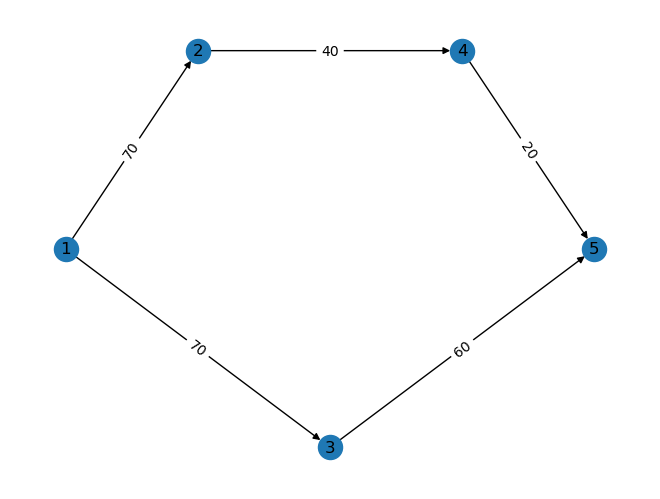

In [8]:
position = nx.get_node_attributes(dg,'position')
weight = nx.get_edge_attributes(dg,'weight')
nx.draw(dg,position,with_labels=True)
nx.draw_networkx_edge_labels(dg,position,edge_labels = weight)
plt.show()

We consider a two-routes pipe problem. We can see there are five nodes and five edges. The water flows from source(node 1) to the sink(node 5). Imagine the edges as pipes and we aim to calculate the maximum flow rate of water at node 5. The labels on the edges are the maximum capacity of every pipe. For example, if we look at the route '1'-'3'-'5', there is 70 units of water flows from '1' to '3', but only 60 units of water can travel from '3' to '5'. Thus the maximum flow for this particular route is 60 units. Another route '1'-'2'-'4'-'5' can only have 20 units of water from '4' to '5'. For that route, we only have maximum flow of water equals to 20 units. In general, if we want to move water from source to the sink, the maximum water flow is equal to the sum of maximum flows in the two routes, and it is equal to 80 units.

#### Google OR-tools Implementation


For the same problem above, we can also import gool or-tools for maximizing network flow problems. The solver can be helpful if there are multiple routes, but first let us experiment on this solver and see if it gives the same result as directed calculation method.
https://developers.google.com/optimization/flow/maxflow

In [9]:
from ortools.graph.python import max_flow

We import the solver max_flow from ortools.graph.python. It will calculate the maximum flows for a source-sink(target) pair.

In [10]:
smf = max_flow.SimpleMaxFlow()

We set up the code and named it smf.

In [11]:
start_nodes = np.array([0,0,1,2,3])
end_nodes = np.array([1,2,3,4,4])
capacities = np.array([70,70,40,60,20])

We start to construct the network flows. The edge goes from the start_nodes to the end_notes with a certain amount of capacity. For instance, the edge capacity from node '0' to node '1' equals to 70.

In [12]:
smf.add_arcs_with_capacity(start_nodes, end_nodes, capacities)

array([0, 1, 2, 3, 4], dtype=int32)

We add the edges together and ready for solve the problem.

In [13]:
status = smf.solve(0, 4)

Then we aim to find the maximum network flows from node '1' to '5' for the above problem. Notice that the default node number in this solver is '0'. For example, the source for the problem is node '1', but we should write '0' in the code.

In [14]:
if status != smf.OPTIMAL:
    print('There was an issue with the max flow input.')
    print(f'Status: {status}')
    exit(1)
print('Max flow:', smf.optimal_flow())
print('')
print('  Arc    Flow / Capacity')
for i in range(smf.num_arcs()):
    print('%1s -> %1s   %3s  / %3s' %
          (smf.tail(i), smf.head(i), smf.flow(i), smf.capacity(i)))

Max flow: 80

  Arc    Flow / Capacity
0 -> 1    20  /  70
0 -> 2    60  /  70
1 -> 3    20  /  40
2 -> 4    60  /  60
3 -> 4    20  /  20


Then we display the results. The maximum flow equals to 80 and it is the same as our directed computation. The follwing displays each edge's flow usage. Notice that all the edges are below the maximum capacity. Therefore, this or-tools solver can be applied for complicated questions to reduce computation time.

### Multiple-Routes Pipe Case

Now we consider multiple-routes pipe case and see if this or-tools can be applied to complicated network flow problems. If we do the prolbem by hand, it takes quite a long time to go through every possible route and get the maximum network flow. Thus, we wish to apply the solver for complicated problems to reduce computation time.

In [15]:
network_graph = pd.DataFrame({'V':['0','0','0','9','9','1','1','2','3','4','6','7','8','8','1','7','10','3','8'], 
                              'E':['1','2','3','4','5','2','3','4','5','5','9','10','10','4','7','11','11','7','11'],
                              'weights':[99,99,99,50,40,60,88,70,40,30,20,65,70,35,55,90,80,70,100]})
dg = nx.DiGraph()
for i, elrow in network_graph.iterrows():
    dg.add_edge(elrow[0], elrow[1],weight=elrow[2])
dg.add_node('0',position=(0.2,0.4))
dg.add_node('1',position=(0.4,0.4))
dg.add_node('2',position=(0.6,0.5))
dg.add_node('3',position=(0.8,0.3))
dg.add_node('4',position=(1.0,0.5))
dg.add_node('5',position=(1.2,0.4))
dg.add_node('6',position=(1.4,0.5))
dg.add_node('7',position=(1.6,0.3))
dg.add_node('8',position=(1.8,0.5))
dg.add_node('9',position=(1.8,0.4))
dg.add_node('10',position=(2,0.3))
dg.add_node('11',position=(2.1,0.4))

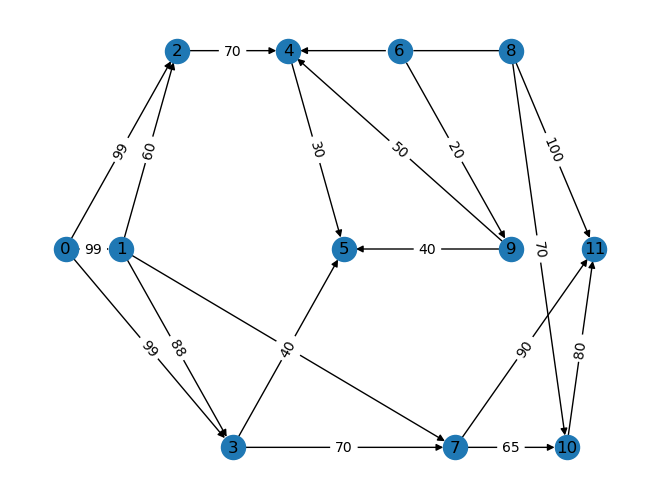

In [16]:
position = nx.get_node_attributes(dg,'position')
weight = nx.get_edge_attributes(dg,'weight')
nx.draw(dg,position,with_labels=True)
nx.draw_networkx_edge_labels(dg,position,edge_labels = weight)
plt.show()

In [17]:
smf1 = max_flow.SimpleMaxFlow()
start_nodes1 = np.array([0,0,0,9,9,1,1,2,3,4,6,7,8,8,1,7,10,3,8])
end_nodes1 = np.array([1,2,3,4,5,2,3,4,5,5,9,10,10,4,7,11,11,7,11])
capacities1 = np.array([99,99,99,50,40,60,88,70,40,30,20,65,70,35,55,90,80,70,100])
smf1.add_arcs_with_capacity(start_nodes1, end_nodes1, capacities1)
status1 = smf1.solve(0, 11)
if status1 != smf.OPTIMAL:
    print('There was an issue with the max flow input.')
    print(f'Status: {status1}')
    exit(1)
print('Max flow:', smf1.optimal_flow())
print('')
print('  Arc    Flow / Capacity')
for i in range(smf1.num_arcs()):
    print('%1s -> %1s   %3s  / %3s' %
          (smf1.tail(i), smf1.head(i), smf1.flow(i), smf1.capacity(i)))

Max flow: 125

  Arc    Flow / Capacity
0 -> 1    55  /  99
0 -> 2     0  /  99
0 -> 3    70  /  99
9 -> 4     0  /  50
9 -> 5     0  /  40
1 -> 2     0  /  60
1 -> 3     0  /  88
2 -> 4     0  /  70
3 -> 5     0  /  40
4 -> 5     0  /  30
6 -> 9     0  /  20
7 -> 10    35  /  65
8 -> 10     0  /  70
8 -> 4     0  /  35
1 -> 7    55  /  55
7 -> 11    90  /  90
10 -> 11    35  /  80
3 -> 7    70  /  70
8 -> 11     0  / 100


This problem contains 12 nodes and 19 edges and the maximum flow equals to 125. All the edges are not exceed the maximum capacities. This proves the solver can have a wide range of solving maximum network flow problems.

## Conclusion
The idea and application of network and network flows exist in many real-life situations, but mostly in very complicated situations like city routes or airplane schedules. The computation of maximum network flow problems are extremely powerful with the help of computer solver, where complicated questions can be solved in seconds and every edge capacity can be calculated as well. This saves a lot of time and makes it easier to adjust the capacities of certain edges in real-life situation. 

## References

Goldberg, A. V., Tardos, É., & Tarjan, R. (1989). Network flow algorithm. Cornell University Operations Research and Industrial Engineering.

Google. (n.d.). Maximum flows &nbsp;|&nbsp; or-tools &nbsp;|&nbsp; google developers. Google. Retrieved December 9, 2022, from https://developers.google.com/optimization/flow/maxflow 

NetworkX. Drawing - NetworkX 2.8.8 documentation. (n.d.). Retrieved December 9, 2022, from https://networkx.org/documentation/stable//reference/drawing.html 

Wikimedia Foundation. (2022, November 28). Flow network. Wikipedia. Retrieved December 9, 2022, from https://en.wikipedia.org/wiki/Flow_network 